<a href="https://colab.research.google.com/github/Grenki-with-cheese/CN6005_GroupProject_u2213935/blob/Part-2-Linear-Regression/LR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries

In [31]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

#1.1 Scikit-Learn libraries (LR, scaler, eval metrics)

In [32]:
#we will not be writing the entire logic ourselves and instead use scikit-learn library
#
#metrics to evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#allows splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 2. Loading Dataset

In [33]:
#loading wine quality dataset (Cortez, et al) through the URL
white_wine_dataset = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_wine = pd.read_csv(white_wine_dataset, sep=";")

print("***************WHITE WINE DATA****************: ")
#printing first 10 rows to ensure the data is loaded correctly
display(white_wine.head(10))
white_wine.count() #numbering the data
#verifying data integrity/number of columns and rows
print(f"Dataset shape: {white_wine.shape}")
#checking for missing values, as said on the page, it should be 0
print(white_wine.isnull().sum())

***************WHITE WINE DATA****************: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


Dataset shape: (4898, 12)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# 3. Separating features (x) and target (y)

In [34]:
#since we are not using a prepackaged scikit-learn database, we will need to select our features and target column
#selecting our features as everything except quality column
X = white_wine.drop('quality', axis=1)
#setting the target column
Y = white_wine['quality']

# 4 Explanatory Data Analysis - Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

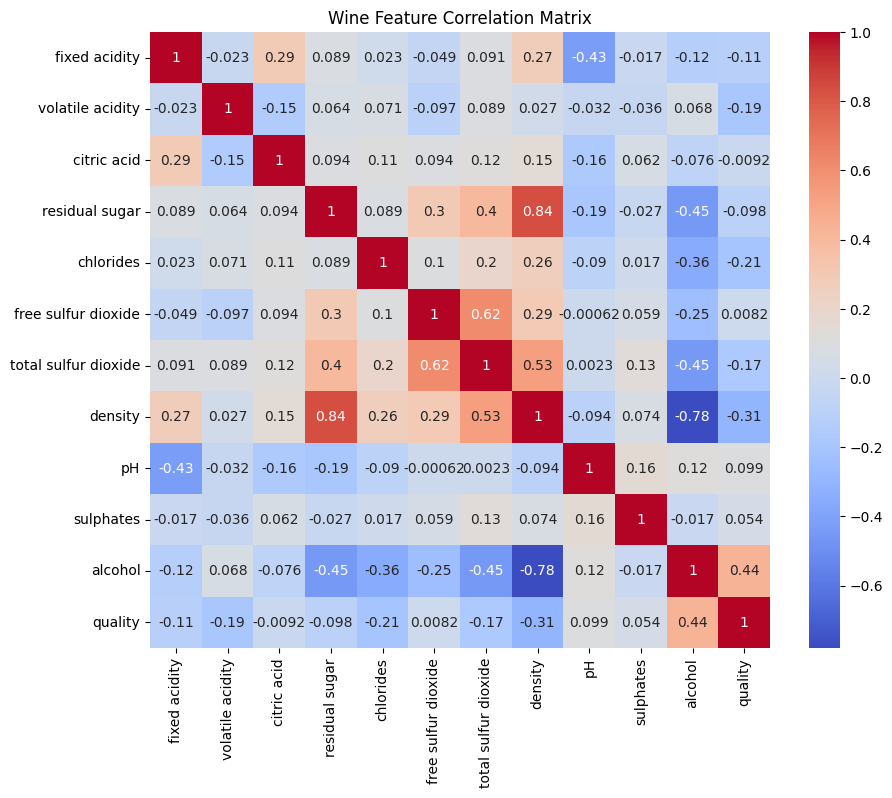

In [35]:
#we can see positive and negative correlation between variable
plt.figure(figsize=(10,8))
sns.heatmap(white_wine.corr(), annot=True, cmap='coolwarm')
plt.title('Wine Feature Correlation Matrix')
plt.show

# 4.1 Explanatory Data Analysis - Feature Distributions

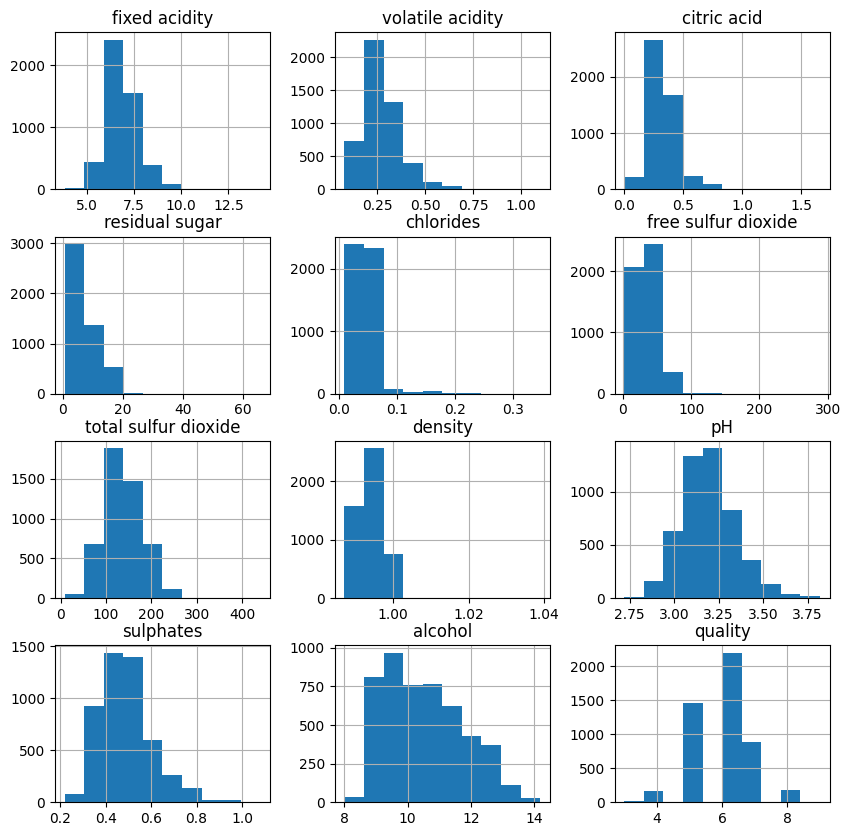

In [36]:
white_wine.hist(figsize=(10,10))
plt.show()

# 5. Splitting dataset into training samples and test data

In [37]:
#Splitting the dataset into 80% training, 20% test
#we split the dataset into training features/target and test features/target
#the point is that using the training data, it should be able to work with test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Shows us the size of training and test sets respectively
#We can also see we have 11 columns out of 13 (12 is the target, 13 is the color which is irrelevant)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (3918, 11)
Test set size: (980, 11)


# 5.1 Scaling data

In [38]:
#standard scaler ensures all features are of equal importance (z-score normalisation)
#it's useful because some features can throw off the machine with big values
scaler=StandardScaler()

#note that we do not fit the test set, to ensure the model does not learn from it
#essentially we do not want to give a machine the solution
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

#creating an instance of LR
model=LinearRegression()
#training the model
model.fit(X_scaled_train,Y_train)
print("Intercept (b0): ", round(model.intercept_,3))
print("Coefficient (b1): ", np.round(model.coef_,3))

Intercept (b0):  5.871
Coefficient (b1):  [ 0.039 -0.195 -0.007  0.366 -0.001  0.085 -0.01  -0.375  0.09   0.074
  0.281]


# 6. Testing and evaluation

***********WHITE WINE QUALITY PREDICTING MODEL EVALUATION***********
Mean Squared Error (MSE): 0.5690
Mean Absolute Error (MAE): 0.5863
R-squared (R2): 0.2653


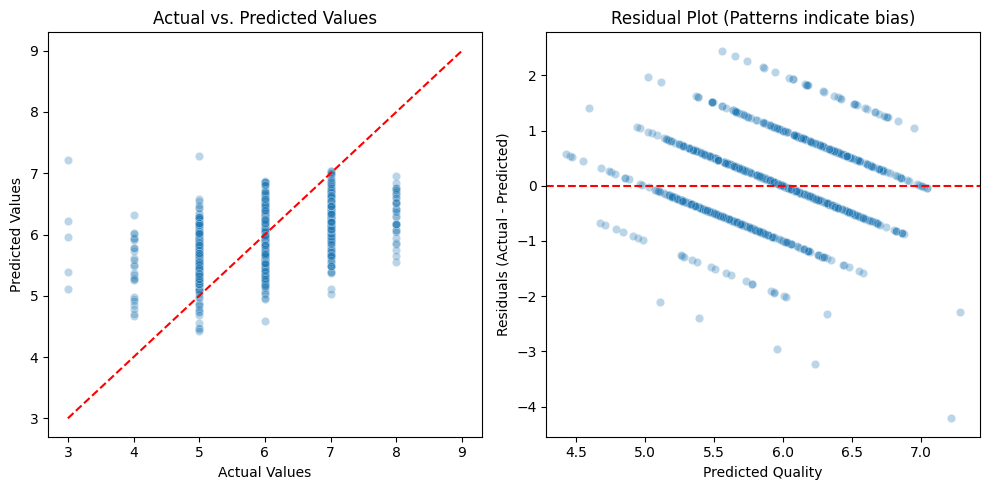

In [39]:
#testing
y_prediction=model.predict(X_scaled_test)

#evaluation of the moddel
mse = mean_squared_error(Y_test, y_prediction)
mae = mean_absolute_error(Y_test, y_prediction)
r2 = r2_score(Y_test, y_prediction)

print("***********WHITE WINE QUALITY PREDICTING MODEL EVALUATION***********")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

#visualising residuals
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.scatterplot(x=Y_test, y=y_prediction, alpha=0.3)
plt.plot([3,9], [3,9], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Subplot 2: Residuals (Errors)
residuals = Y_test - y_prediction
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_prediction, y=residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (Patterns indicate bias)")
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals (Actual - Predicted)")

plt.tight_layout()
plt.show()

# 7. SHAP - Interpreting feature contribution

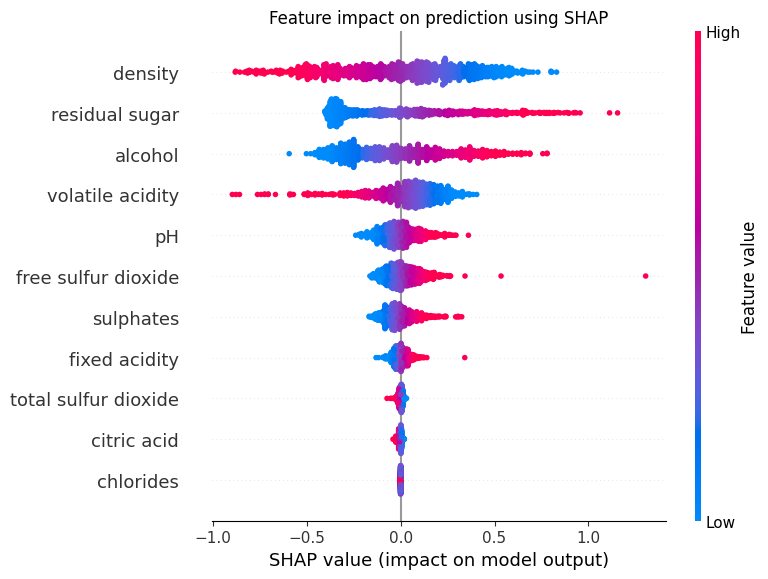

In [40]:
explainer = shap.LinearExplainer(model, X_scaled_train)
shap_values = explainer.shap_values(X_scaled_test)
plt.title('Feature impact on prediction using SHAP')
shap.summary_plot(shap_values, X_scaled_test, feature_names=X_test.columns)
plt.show()